<a href="https://colab.research.google.com/github/JessMog/Financial-Inclusion/blob/main/Financial_Inclusion_in_Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

## **Problem Definition**
The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### **Defining the question**


---



*    Figure out how we can predict which individuals are most likely to have or use a bank account. 
*   Indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda



### **Defining the metric for success**


---



*   Indicators of financial inclusion
*   Access to financial services
*   Economic growth



### **Defining the context**


---



*   Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.



### **Experimental design taken**


---

*   Factor analysis
*   Principal component analysis
*   Discriminant analysis





### **Appropriateness of the available data**


---
The main dataset contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018, and more information about these surveys can be found here:

*  FinAccess Kenya 2018. [https://fsdkenya.org/publication/finaccess2019/]
*  Finscope Rwanda 2016. [http://www.statistics.gov.rw/publication/finscope-rwanda-2016] 
*  Finscope Tanzania 2017. [http://www.fsdt.or.tz/finscope/] 
*  Finscope Uganda 2018. [http://fsduganda.or.ug/finscope-2018-survey-report/]



Dataset Files:

*  Variable Definitions: https://bit.ly/VariableDefinitions (Links to an external site.) 
*  Dataset: https://bit.ly/FinancialDataset (Links to an external site.) 



## **Finding and dealing with outliers, anomalies, and missing data within the dataset**

### **Importing Libraries**

In [1]:
# Importing libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Preview of the Financial Dataset

url = 'http://bit.ly/FinancialDataset'
financial = pd.read_csv(url)
financial.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
##Preview of the financial dataset

financial.tail(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [4]:
## Checking the Data types of each column

financial.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [5]:
## Checking for missing data

financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [6]:
##
## A description of the fields in the Variables dataset

description = pd.read_csv("VariableDefinitions.csv")
description

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


### **Dealing with the Datasets**

In [7]:
#Checking the sum of missing values in the financial dataset

financial.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [8]:
## Dropping the missing values

f = financial.dropna()

## Preview of the sum of missing values after data cleaning

f.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

### **Handling Outliers**

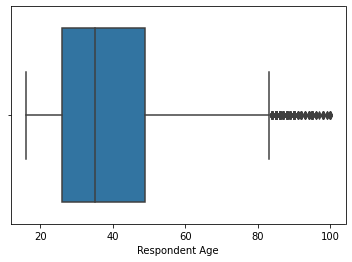

In [9]:
# Visualising outliers in the respondent age column 

sns.boxplot(x=financial['Respondent Age'])

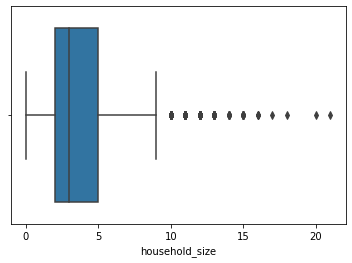

In [10]:
# Visulising the outliers in the household_size column 

sns.boxplot(x=financial['household_size'])

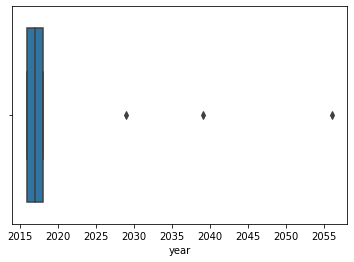

In [11]:
# Visualising outliers in the year column 

sns.boxplot(x=financial['year'])

In [12]:
# Quantiles

Q1 = financial.quantile(0.25)
Q3 = financial.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'

finance = financial[~((financial < (Q1 - 1.5 * IQR)) | (financial > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
 
print(finance.shape)

# Printing the shape of our old dataset

print(financial.shape)

(22903, 13)
(23524, 13)


In [13]:
# More on data cleaning

finance.drop_duplicates()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23518,Uganda,2018,uniqueid_2111,No,Rural,Yes,NaN,20.0,Female,Child,Single/Never Married,Primary education,No Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


In [14]:
# Identifying missing data

finance.isnull().values.any()

True

In [15]:
# Droping all duplicates

finance.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# droping columns

to_drop = ['uniqueid','The relathip with head','marital_status','year']
financial.drop(to_drop, axis=1, inplace=True)

In [17]:
#checking if my dataset has any duplicates

finance.duplicated().sum()

0

## **Data Analysis**

### **Exploratory Analysis**

In [18]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22903 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 22889 non-null  object 
 1   year                    22903 non-null  int64  
 2   uniqueid                22903 non-null  object 
 3   Has a Bank account      22867 non-null  object 
 4   Type of Location        22888 non-null  object 
 5   Cell Phone Access       22892 non-null  object 
 6   household_size          22876 non-null  float64
 7   Respondent Age          22870 non-null  float64
 8   gender_of_respondent    22870 non-null  object 
 9   The relathip with head  22899 non-null  object 
 10  marital_status          22872 non-null  object 
 11  Level of Educuation     22874 non-null  object 
 12  Type of Job             22873 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.4+ MB


In [19]:
financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               23510 non-null  object 
 1   Has a Bank account    23488 non-null  object 
 2   Type of Location      23509 non-null  object 
 3   Cell Phone Access     23513 non-null  object 
 4   household_size        23496 non-null  float64
 5   Respondent Age        23490 non-null  float64
 6   gender_of_respondent  23490 non-null  object 
 7   Level of Educuation   23495 non-null  object 
 8   Type of Job           23494 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.6+ MB


## **Univariate Analysis**

## *Measures of Central Tendancy*

In [20]:
# Finding the modal age

finance['Respondent Age'].mode()

0    30.0
dtype: float64

In [21]:
# Finding the mean age

finance['Respondent Age'].mean()

38.34508089199825

In [22]:
# Finding the median age

finance['Respondent Age'].median()

35.0

In [23]:
# Finding the modal household size

finance['household_size'].mode()

0    2.0
dtype: float64

In [24]:
# Finding the mean household size

finance['household_size'].mean()

3.573395698548697

In [25]:
# Finding the meadian household size

finance['household_size'].median()

3.0

## *Measures of Dispersion*

In [26]:
# Standard deviation of household sizes

finance['household_size'].std()

2.07978318144993

In [27]:
# Standard deviation of ages

finance['Respondent Age'].std()

15.804022763001404

In [28]:
# Variance of household sizes

finance['household_size'].var()

4.325498081841992

In [29]:
# Variance of ages

finance['Respondent Age'].var()

249.76713549346655

## *Quantiles*

In [30]:
# Quantiles of ages

finance['Respondent Age'].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    48.0
Name: Respondent Age, dtype: float64

In [31]:
# Quantiles of household sizes

finance['household_size'].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

## *Skewness*

In [32]:
# Skewness of age

finance['Respondent Age'].skew()

0.7409754960713362

In [33]:
# Skewness of household sizes

finance['household_size'].skew()

0.6107328357162268

## **Visualisaton of Data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


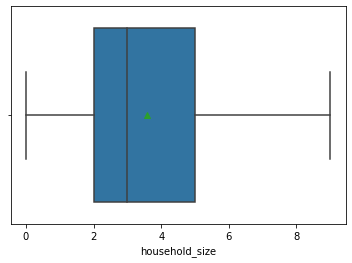

In [34]:
sns.boxplot(finance['household_size'], showmeans=True)

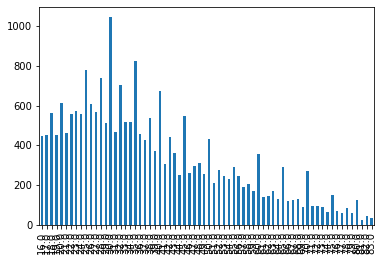

In [35]:
finance['Respondent Age'].value_counts().sort_index().plot.bar()

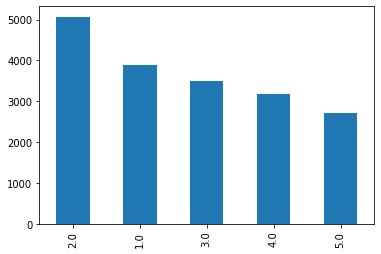

In [36]:
finance['household_size'].value_counts().head().plot.bar()

### **Recommndations**


---
After analysis of the data, main foucus shoul be intgrated on the youth 



## **Bivariate Analysis**



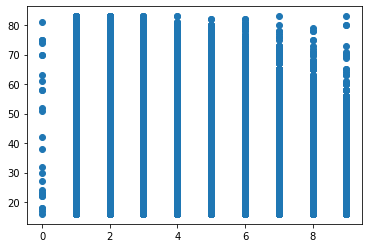

In [37]:
#Scatter plot to show the relationship between the two columns

plt.scatter(finance["household_size"], finance["Respondent Age"])
plt.show()

In [38]:
#Showing the correlation between my numerical columns
finance.corr()

,year,household_size,Respondent Age
year,1.000000,-0.097401,-0.024005
household_size,-0.097401,1.000000,-0.106239
Respondent Age,-0.024005,-0.106239,1.000000


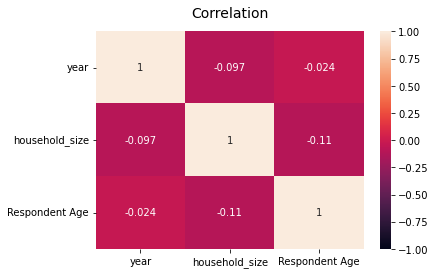

In [39]:
#heatmap to visualise the correlation

heatmap = sns.heatmap(finance.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation', fontdict={'fontsize':14}, pad=14);

## Grouping Data

The conlusion from the analysis is the data presented has to be grouped further to make sence of it

In [40]:
fin = finance.select_dtypes(exclude=[np.number])
fin

,country,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,uniqueid_1,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,uniqueid_2,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,uniqueid_3,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,uniqueid_4,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,uniqueid_5,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...
23518,Uganda,uniqueid_2111,No,Rural,Yes,Female,Child,Single/Never Married,Primary education,No Income
23519,Uganda,uniqueid_2113,No,Rural,Yes,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,uniqueid_2114,No,Rural,Yes,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,uniqueid_2115,No,Rural,Yes,Female,Parent,Widowed,Primary education,Other Income


In [41]:
#Grouping data according to countries which have a bank account

fi = fin.groupby(['country','Has a Bank account'])
fi

In [42]:
fi.size()

country   Has a Bank account
Kenya     No                    4379
          Yes                   1492
Rwanda    No                    7576
          Yes                    986
Tanzania  No                    5890
          Yes                    603
Uganda    No                    1761
          Yes                    166
dtype: int64

In [43]:
fi1 = fi.size().unstack()
fi1

Has a Bank account,No,Yes
country,,
Kenya,4379,1492
Rwanda,7576,986
Tanzania,5890,603
Uganda,1761,166


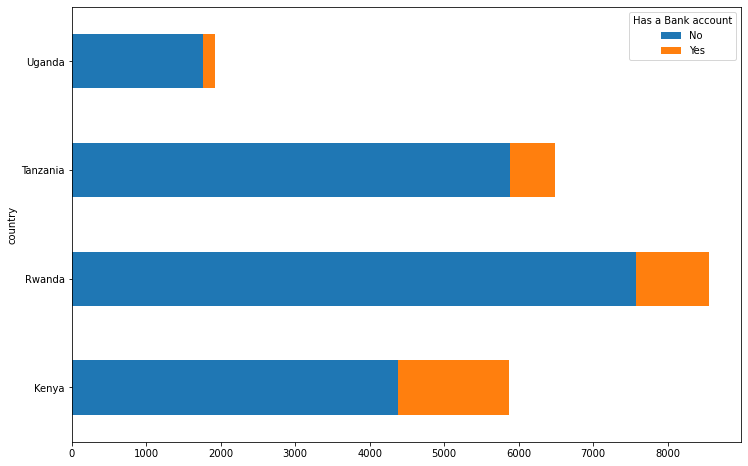

In [44]:
fi1.plot(kind='barh', stacked=True, figsize=[12,8])

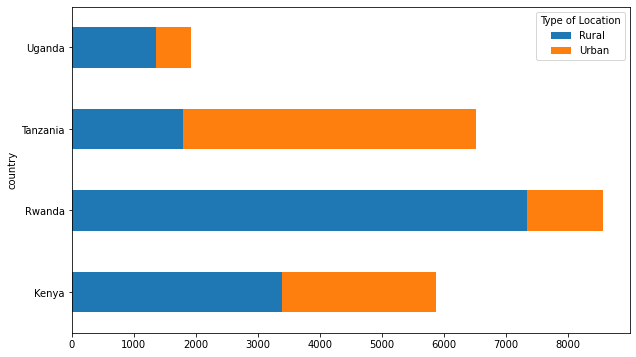

In [45]:
# cheking the country and location stack column chart 
fi = fin.groupby(['country','Type of Location'])
fi
fi.size()
fi1 = fi.size().unstack()
fi1
fi1.plot(kind='barh', stacked=True, figsize=[10,6])

## Analysis of the results 


---
From the visualisation of the results, most of the countries covered in rural population other than Tanzania, Rwanda has the highest population under rural distribution



# **Multivariate Analysis**

In [47]:
fi1.columns

Index(['Rural', 'Urban'], dtype='object', name='Type of Location')

In [48]:
finance.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

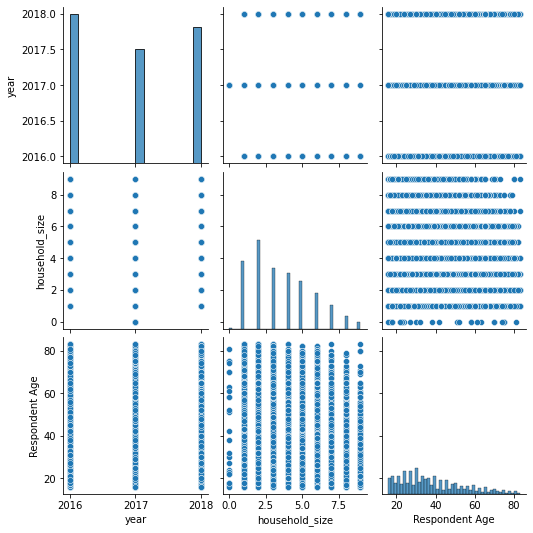

In [49]:
sns.pairplot(finance)
plt.show()

# **Implementing the solution**




### 1. Principal component analysis



In [51]:
financial.head()

,country,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Secondary education,Self employed
1,Kenya,No,Rural,No,5.0,70.0,Female,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5.0,34.0,Female,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8.0,26.0,Male,Primary education,Informally employed


In [52]:
financial.describe()

,household_size,Respondent Age
count,23496.000000,23490.000000
mean,3.681818,38.804300
std,2.279933,16.519996
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(financial[['household_size', 'Respondent Age']])
scaled_data = scaler.transform(financial[['household_size', 'Respondent Age']])

In [54]:
scaled_data = pd.DataFrame(scaled_data)

In [55]:
finance = scaled_data.fillna(0)
finance.head()

,0,1
0,-0.299058,-0.896163
1,0.578179,1.888400
2,0.578179,-0.775095
3,0.578179,-0.290823
4,1.894035,-0.775095


In [56]:
from sklearn.decomposition import PCA
logmodel = PCA(n_components=2)
logmodel.fit(finance)
pca_x = logmodel.transform(finance)

In [58]:
finance.shape

(23524, 2)

In [59]:
pca_x.shape

(23524, 2)

In [60]:
f = pd.DataFrame(logmodel.components_, columns = ['household_size', 'Respondent Age'])

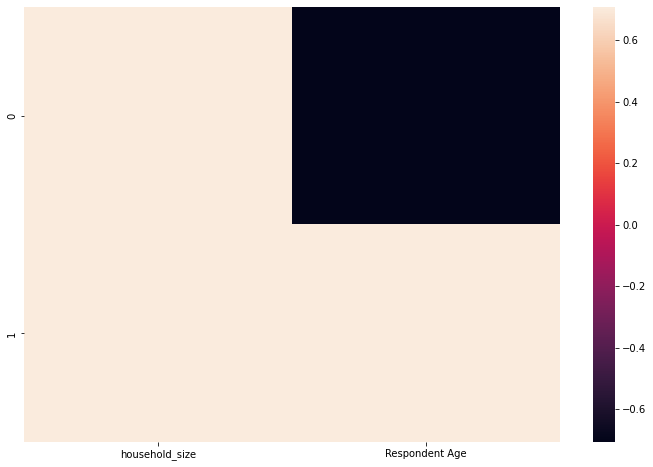

In [62]:
plt.figure(figsize=(12,8))
sns.heatmap(f)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'First principle component ')

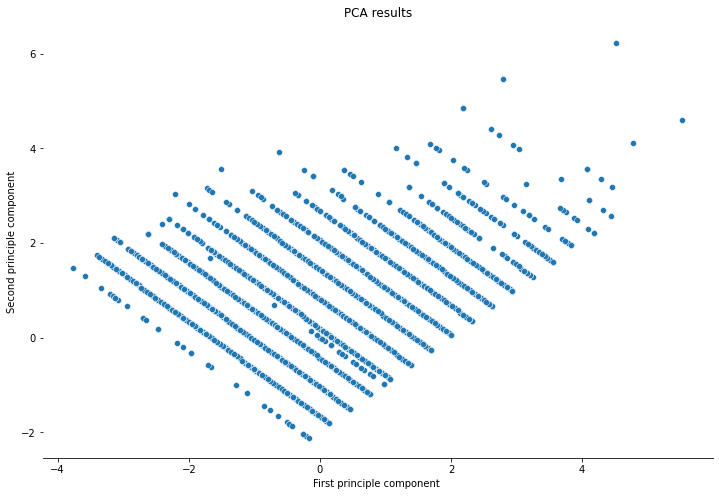

In [64]:
plt.figure(figsize=(12,8))
ty=sns.scatterplot(pca_x[:,0], pca_x[:,1])
sns.despine(left=True)
ty.set_title('PCA results')
ty.set_ylabel('Second principle component ')
ty.set_xlabel('First principle component ')

In [65]:
pca_x

array([[ 0.42176566, -0.84537461],
       [-0.92553455,  1.74462955],
       [ 0.95683505, -0.13975188],
       ...,
       [ 0.91405392, -0.09692503],
       [ 1.40634218,  0.65152456],
       [ 2.76510091,  1.1532096 ]])

# **Factor Analysis**

In [66]:
# 
to_drop = ['country','Has a Bank account','Type of Location','Cell Phone Access','gender_of_respondent','Level of Educuation','Type of Job']
financial.drop(to_drop, axis=1, inplace=True)

In [67]:
financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   household_size  23496 non-null  float64
 1   Respondent Age  23490 non-null  float64
dtypes: float64(2)
memory usage: 367.7 KB


In [68]:
import tensorflow as tf

In [69]:
# installing factor analyser
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(financial)
chi_square_value, p_value

(339.5090114012851, 4.0929770436102124e-76)

In [70]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis

In [71]:
fina = financial.fillna(0)

In [73]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(fina)
kmo_model

0.49999999999995803

In [74]:
from sklearn.datasets import load_iris

In [75]:
fa = FactorAnalysis()
fa.fit(fina, 25)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=None,
               noise_variance_init=None, random_state=0,
               svd_method='randomized', tol=0.01)

# **Discriminant Analysis**

In [77]:
x = fina.iloc[:, :-1].values
y = fina.iloc[:, -1].values

In [78]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train, x_test)

[[ 0.13982889]
 [-0.29656247]
 [-1.1693452 ]
 ...
 [ 0.13982889]
 [ 1.01261162]
 [ 0.13982889]] [[2.32178572]
 [0.57622026]
 [1.01261162]
 ...
 [1.01261162]
 [1.01261162]
 [0.57622026]]


In [80]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 86 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
